In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
database = pd.read_csv('vehicles.csv')

In [27]:
np.random.seed(0) 

In [28]:
database.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [29]:

database.head(5)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [30]:
missing_values_count = pd.DataFrame({'Null': database.isnull().sum()})
total = len(database)
percentage_null = round((missing_values_count['Null']/total)*100,1)
missing_values_count['Percentage'] = percentage_null
missing_values_count.sort_values(by= 'Null' , ascending = False)

,Null,Percentage
county,426880,100.0
size,306361,71.8
cylinders,177678,41.6
condition,174104,40.8
VIN,161042,37.7
drive,130567,30.6
paint_color,130203,30.5
type,92858,21.8
manufacturer,17646,4.1
title_status,8242,1.9


In [31]:
database.drop(['lat', 'long', 'region_url', 'url', 'VIN', 'county', 'id', 'image_url'], axis = 1, inplace = True)

In [32]:
database.shape

(426880, 18)

In [33]:
database.duplicated().sum()

20

In [34]:
database = database.drop_duplicates(keep='first')

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'year'}>],
       [<Axes: title={'center': 'odometer'}>, <Axes: >]], dtype=object)

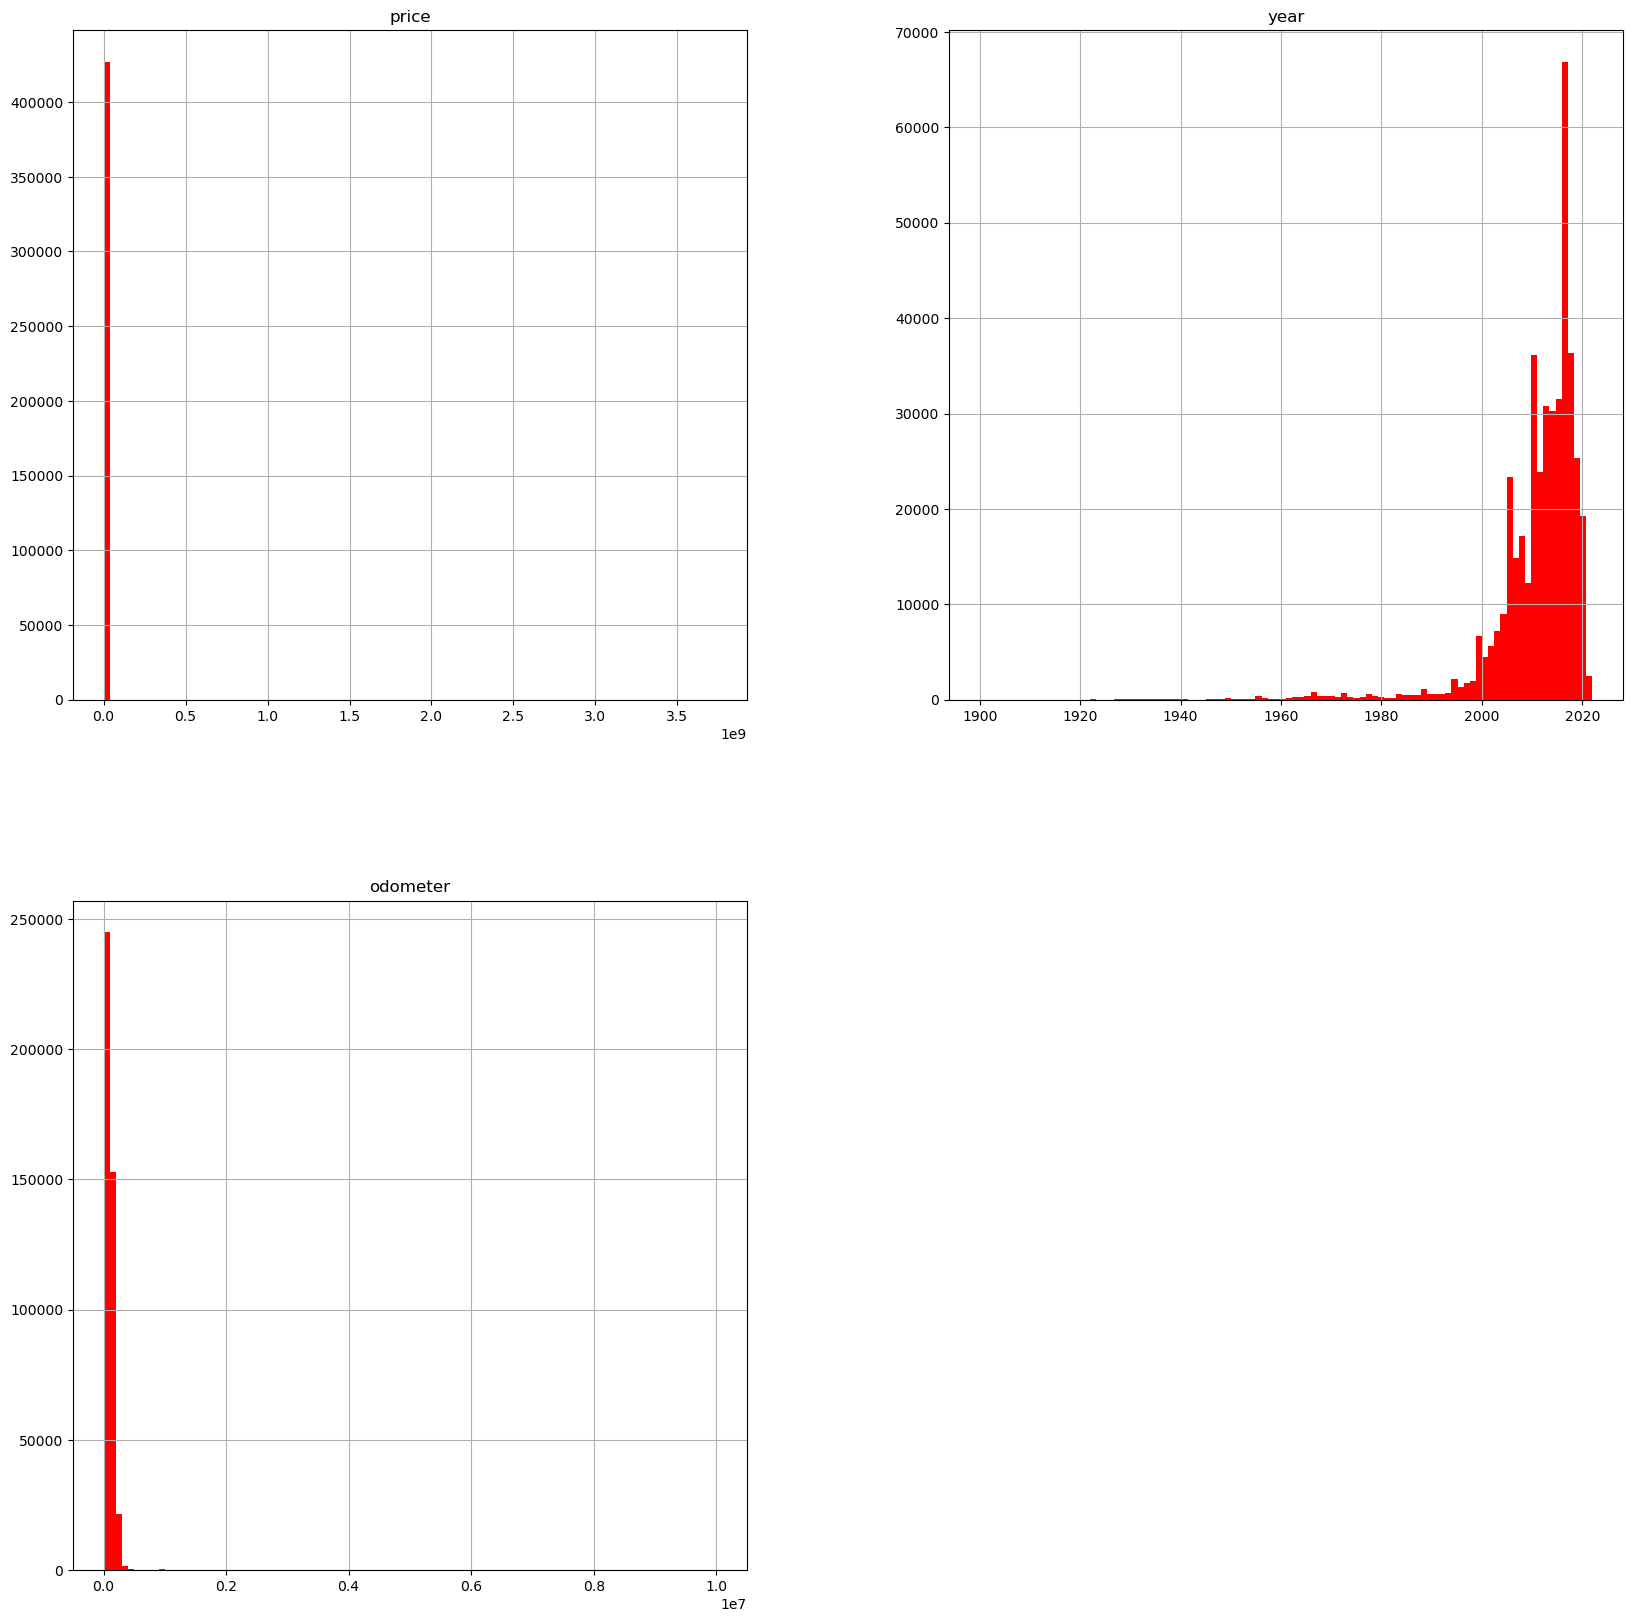

In [35]:
database.hist(bins= 100, figsize = (20,20), color = 'r')

<Axes: xlabel='type', ylabel='count'>

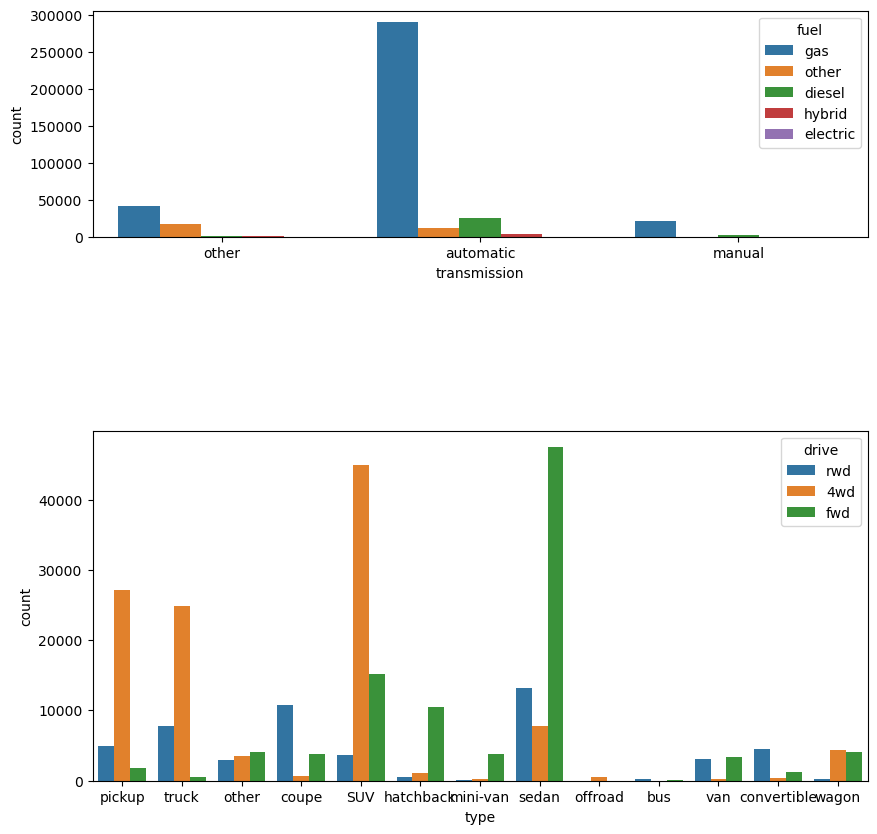

In [36]:
plt.figure(figsize=[10,10])
plt.subplot(311)
sns.countplot(x = 'transmission', hue = 'fuel', data = database)
plt.subplot(212)
sns.countplot(x = 'type', hue = 'drive', data = database)

In [37]:
test = database[['manufacturer', 'condition',
       'cylinders', 'fuel', 'title_status', 'transmission',
       'drive', 'size', 'type', 'paint_color']]

In [38]:
chart = pd.DataFrame(columns = ['columns', 'values'])

for i, j in test.items():
    chart = chart._append({'columns': i, 'values': j.unique()}, 
                 ignore_index=True)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
chart

,columns,values
0,manufacturer,"[nan, gmc, chevrolet, toyota, ford, jeep, nissan, ram, mazda, cadillac, honda, dodge, lexus, jaguar, buick, chrysler, volvo, audi, infiniti, lincoln, alfa-romeo, subaru, acura, hyundai, mercedes-benz, bmw, mitsubishi, volkswagen, porsche, kia, rover, ferrari, mini, pontiac, fiat, tesla, saturn, mercury, harley-davidson, datsun, aston-martin, land rover, morgan]"
1,condition,"[nan, good, excellent, fair, like new, new, salvage]"
2,cylinders,"[nan, 8 cylinders, 6 cylinders, 4 cylinders, 5 cylinders, other, 3 cylinders, 10 cylinders, 12 cylinders]"
3,fuel,"[nan, gas, other, diesel, hybrid, electric]"
4,title_status,"[nan, clean, rebuilt, lien, salvage, missing, parts only]"
5,transmission,"[nan, other, automatic, manual]"
6,drive,"[nan, rwd, 4wd, fwd]"
7,size,"[nan, full-size, mid-size, compact, sub-compact]"
8,type,"[nan, pickup, truck, other, coupe, SUV, hatchback, mini-van, sedan, offroad, bus, van, convertible, wagon]"
9,paint_color,"[nan, white, blue, red, black, silver, grey, brown, yellow, orange, green, custom, purple]"


In [39]:
pd.reset_option('display.max_rows', None)
pd.reset_option('display.max_columns', None)
pd.reset_option('display.width', None)
pd.reset_option('display.max_colwidth', -1)

In [40]:
import re

manufacturer = '(gmc | hyundai | toyota | mitsubishi | ford | chevrolet | ram | buick | jeep | dodge | subaru | nissan | audi | rover  | lexus \
| honda | chrysler | mini | pontiac | mercedes-benz | cadillac | bmw | kia | volvo | volkswagen | jaguar | acura | saturn | mazda | \
mercury | lincoln | infiniti | ferrari | fiat | tesla | land rover | harley-davidson | datsun | alfa-romeo | morgan | aston-martin | porche \
| hennessey)'
condition = '(excellent | good | fair | like new | salvage | new)'
fuel = '(gas | hybrid | diesel |electric)'
title_status = '(clean | lien | rebuilt | salvage | missing | parts only)'
transmission = '(automatic | manual)'
drive = '(4x4 | awd | fwd | rwd | 4wd)'
size = '(mid-size | full-size | compact | sub-compact)'
type_ = '(sedan | truck | SUV | mini-van | wagon | hatchback | coupe | pickup | convertible | van | bus | offroad)'
paint_color = '(red | grey | blue | white | custom | silver | brown | black | purple | green | orange | yellow)'
cylinders = '(\s[1-9] cylinders? |\s1[0-6]? cylinders?)'

keys =    ['manufacturer', 'condition', 'fuel', 'title_status', 'transmission', 'drive','size', 'type', 'paint_color' , 'cylinders']
columns = [ manufacturer,   condition,   fuel,  title_status, transmission ,drive, size, type_, paint_color,   cylinders]

for i,column in zip(keys,columns):
    database[i] = database[i].fillna(
      database['description'].str.extract(column, flags=re.IGNORECASE, expand=False)).str.lower()

database.drop('description', axis=1, inplace= True)

In [41]:
test = database[['manufacturer', 'condition',
       'cylinders', 'fuel', 'title_status', 'transmission',
       'drive', 'size', 'type', 'paint_color']]
chart = pd.DataFrame(columns = ['columns', 'values'])

for i, j in test.items():
    chart = chart._append({'columns': i, 'values': j.unique()}, 
                 ignore_index=True)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
chart

,columns,values
0,manufacturer,"[nan, gmc, chevrolet, toyota, ford, jeep, nissan, ram, mazda, cadillac, honda, dodge, lexus, jaguar, buick, chrysler, volvo, audi, infiniti, lincoln, alfa-romeo, subaru, acura, hyundai, mercedes-benz, bmw, mitsubishi, volkswagen, porsche, kia, cadillac , gmc , ford , rover, ferrari, mini, bmw , pontiac, fiat, jaguar , hyundai , mini , mercedes-benz , toyota , dodge , mazda , tesla, saturn, buick , mercury, ram , chevrolet , jeep , volkswagen , morgan , lincoln , lexus , kia , pontiac , harley-davidson, honda , volvo , chrysler , nissan , mercury , datsun, audi , ferrari , subaru , acura , infiniti , fiat , aston-martin, datsun , land rover , land rover, mitsubishi , tesla , hennessey, saturn , morgan, porche , harley-davidson ]"
1,condition,"[nan, good, excellent, fair, good , like new, new, new, fair , like new , excellent , salvage, salvage ]"
2,cylinders,"[nan, 8 cylinders, 6 cylinders, 4 cylinders, 5 cylinders, other, 4 cylinder , 3 cylinders, 5 cylinder , 10 cylinders, 12 cylinders, 6 cylinder , 8 cylinder , 8 cylinders , 6 cylinders , 4 cylinders , 5 cylinders , 3 cylinder , 2 cylinders , \t4 cylinder , 10 cylinder, 12 cylinders, 2 cylinder , 12 cylinder, 7 cylinders , 10 cylinders, 1 cylinder ]"
3,fuel,"[nan, gas, other, diesel, hybrid, electric, diesel , hybrid , gas ]"
4,title_status,"[nan, clean, rebuilt, lien, salvage, missing, clean , parts only, salvage , rebuilt , parts only]"
5,transmission,"[nan, other, automatic, manual, automatic , manual]"
6,drive,"[nan, rwd, 4wd, fwd, 4x4 , awd , 4wd, rwd , fwd ]"
7,size,"[nan, full-size, mid-size, compact, compact , sub-compact, full-size , mid-size , sub-compact]"
8,type,"[nan, pickup, truck, other, coupe, suv, hatchback, mini-van, sedan, wagon , offroad, bus, van, convertible, suv , truck , pickup , wagon, coupe , van , convertible , sedan , offroad, bus , hatchback , mini-van ]"
9,paint_color,"[nan, white, blue, red, black, silver, grey, red , brown, yellow, orange, green, black , blue , purple , silver , custom , custom, white , brown , grey , orange , green , purple, yellow]"


In [42]:
pd.reset_option('display.max_rows', None)
pd.reset_option('display.max_columns', None)
pd.reset_option('display.width', None)
pd.reset_option('display.max_colwidth', -1)

In [43]:
columns = ['manufacturer', 'condition',
       'cylinders', 'fuel', 'title_status', 'transmission',
       'drive', 'size', 'type', 'paint_color']
for i in columns: 
    database[i] = database[i].str.strip()

In [44]:
database['cylinders'].unique()

array([nan, '8 cylinders', '6 cylinders', '4 cylinders', '5 cylinders',
       'other', '4 cylinder', '3 cylinders', '5 cylinder', '10 cylinders',
       '12 cylinders', '6 cylinder', '8 cylinder', '3 cylinder',
       '2 cylinders', '10 cylinder', '2 cylinder', '12 cylinder',
       '7 cylinders', '1 cylinder'], dtype=object)

In [45]:
values = {"4 cylinder" : "4 cylinders",
         "6 cylinder" : "6 cylinders",
         "8 cylinder" : "8 cylinders",
         "3 cylinder" : "3 cylinders",
         "5 cylinder" : "5 cylinders",
         "10 cylinder": "10 cylinders",
         "7 cylinder" : "7 cylinders",
         "2 cylinder": '2 cylinders',
         "12 cylinder": "12 cylinders"}
for i,j in values.items():
    database.replace(to_replace=i, value=j, inplace=True)
database['cylinders'].unique()

array([nan, '8 cylinders', '6 cylinders', '4 cylinders', '5 cylinders',
       'other', '3 cylinders', '10 cylinders', '12 cylinders',
       '2 cylinders', '7 cylinders', '1 cylinder'], dtype=object)

In [46]:
missing_values_count = pd.DataFrame({'Null': database.isnull().sum()})
total = len(database)
percentage_null = round((missing_values_count['Null']/total)*100,1)
missing_values_count['Percentage'] = percentage_null
missing_values_count.sort_values(by= 'Null' , ascending = False)

,Null,Percentage
size,288996,67.7
cylinders,168231,39.4
drive,98322,23.0
condition,83314,19.5
type,57203,13.4
paint_color,51200,12.0
manufacturer,12098,2.8
title_status,6442,1.5
model,5266,1.2
odometer,4389,1.0


C:\Users\ishmi\AppData\Local\Temp\ipykernel_7844\1605198309.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(database['price'], bins = 5)
C:\Users\ishmi\AppData\Local\Temp\ipykernel_7844\1605198309.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(database['odometer'], bins = 5)


<Axes: xlabel='odometer', ylabel='Density'>

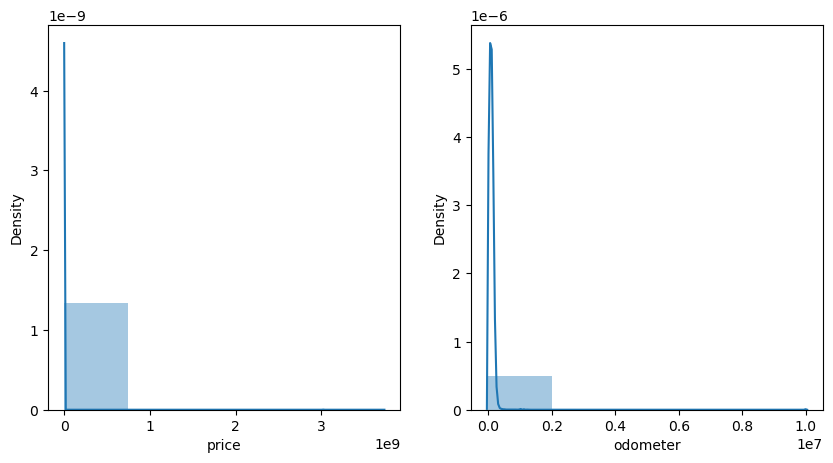

In [49]:
plt.figure(figsize=[10,5])
plt.subplot(121)
sns.distplot(database['price'], bins = 5)
plt.subplot(122)
sns.distplot(database['odometer'], bins = 5)